# Anomaly Detection

## Identify Anomalies in a System

## Group 29

| Name                             | BITS ID     |
| ---------------------------------| ----------- |
| Siben Nayak                      | 2022DC04386 |
| PORURI V S HARI HARA NANDAN      | 2022DC04433 |
| Row 2                            | Row 2       |
| Row 2                            | Row 2       |


## Data Visualization and Exploration

#### Import the libraries needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#### Load data and store in dataframe

In [2]:
request_url = urllib.request.urlopen('https://raw.githubusercontent.com/theawesomenayak/datasets/main/anomaly.csv')
df = pd.read_csv(request_url)
df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


Get info on dataset schema to identify numerical and categorical attributes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   hot                          22544 non-null  int64  
 9   num_failed_logins            22544 non-null  int64  
 10  logged_in                    22544 non-null  int64  
 11  num_compromised              22544 non-null  int64  
 12  root_shell                   22544 non-null  int64  
 13  su_attempted    

Get all categorical attributes (The attribute class can give us a hint that we
are dealing with binomial classification to find whether the data packet is anamoly or normal)

In [4]:
df.select_dtypes(exclude=[np.number])

,protocol_type,service,flag,class
0,tcp,private,REJ,anomaly
1,tcp,private,REJ,anomaly
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,anomaly
4,tcp,telnet,RSTO,anomaly
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,anomaly
22542,udp,domain_u,SF,normal


Get all numerical attributes

In [5]:
numeric_input_df=df.select_dtypes(include=[np.number])

Get the stats on dataset

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22531.000000,22532.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,...,193.863965,140.752663,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,...,94.042593,111.786948,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df['class'].value_counts()

anomaly    12833
normal      9711
Name: class, dtype: int64

The above code cell clearly shows the dataset is well balanced, no action is required to take to balance it


We will try to plot strip plot to see the distribution of values of different columns for class

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


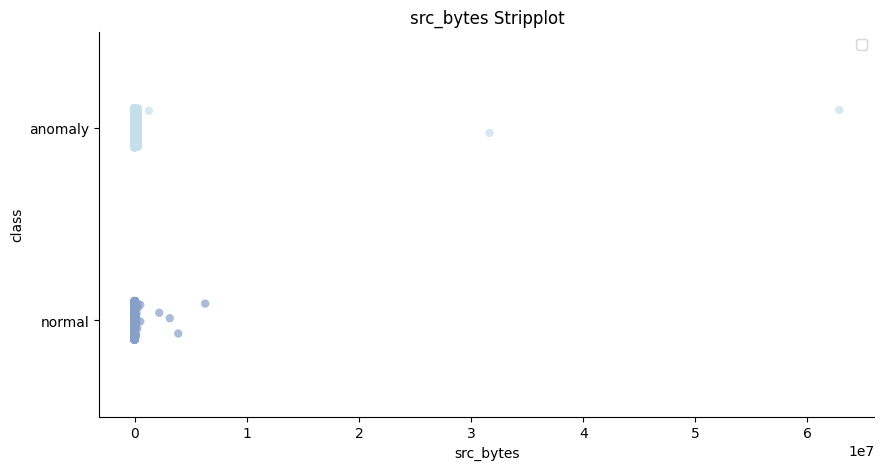

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


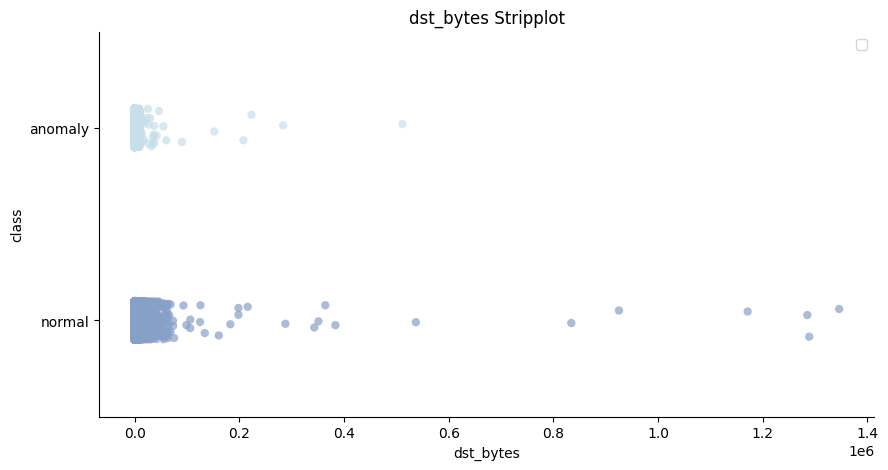

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


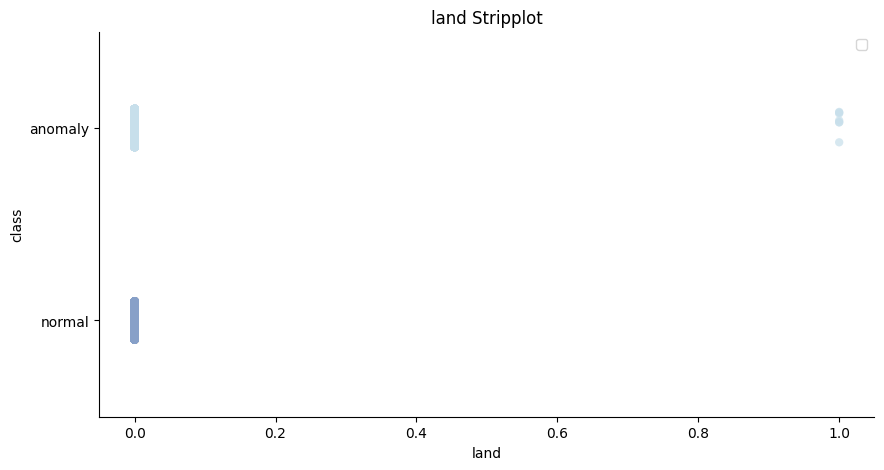

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


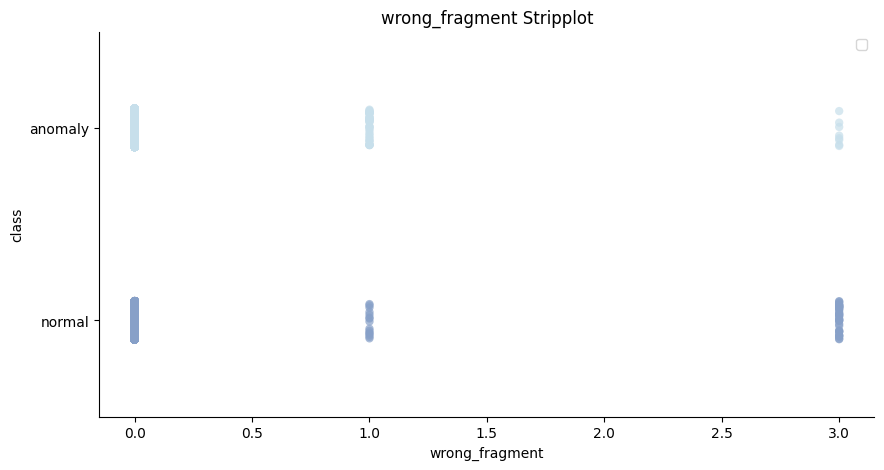

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


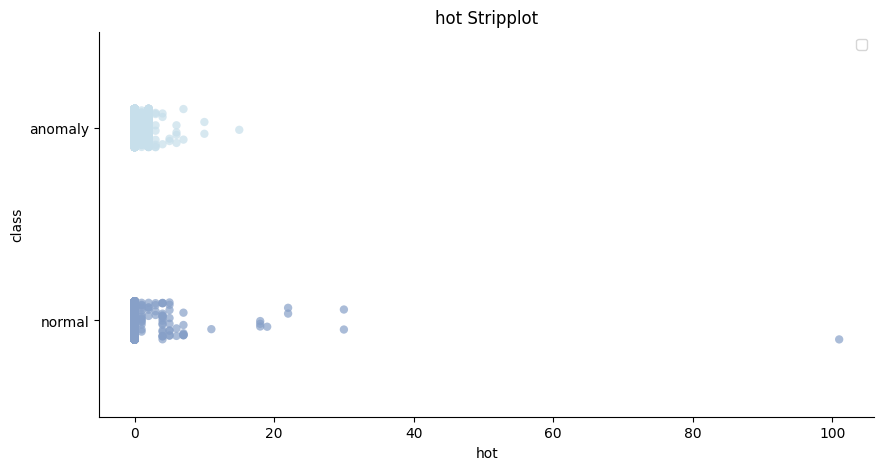

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


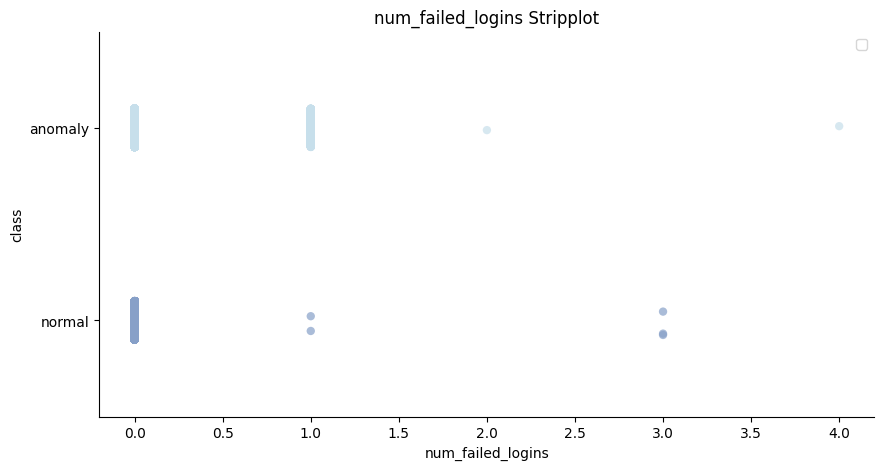

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


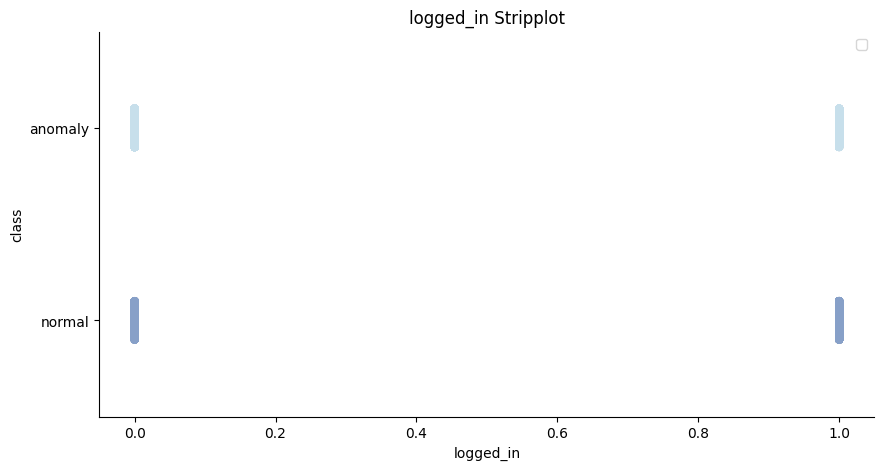

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


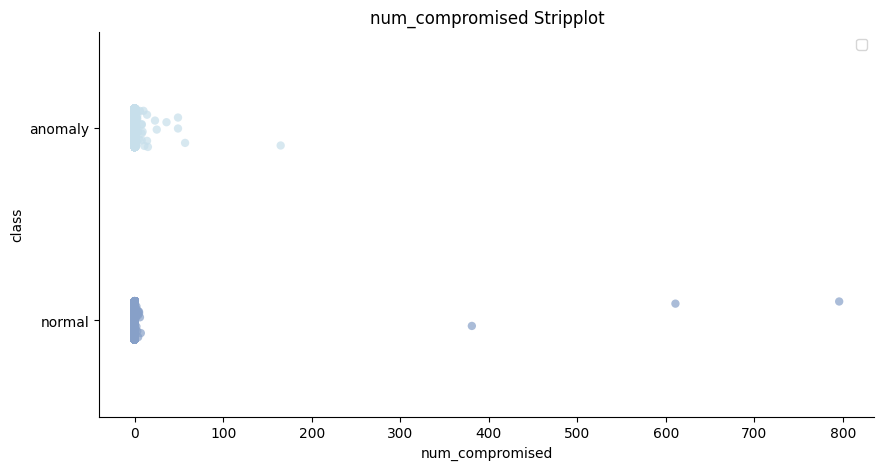

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


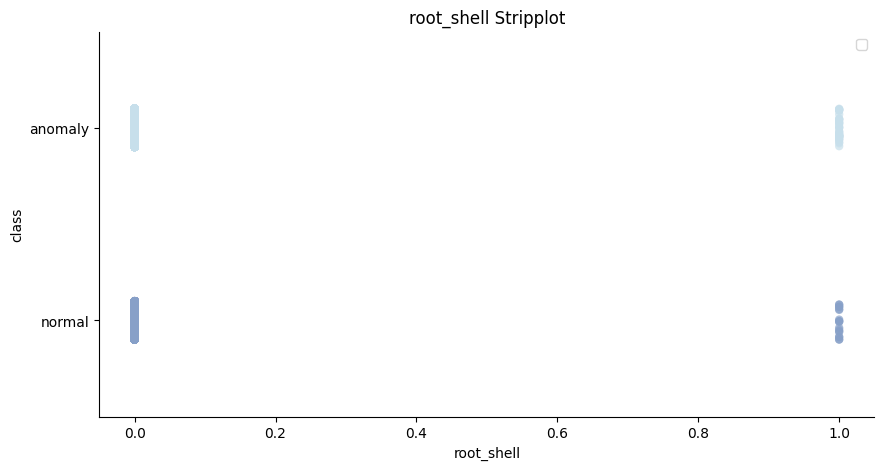

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


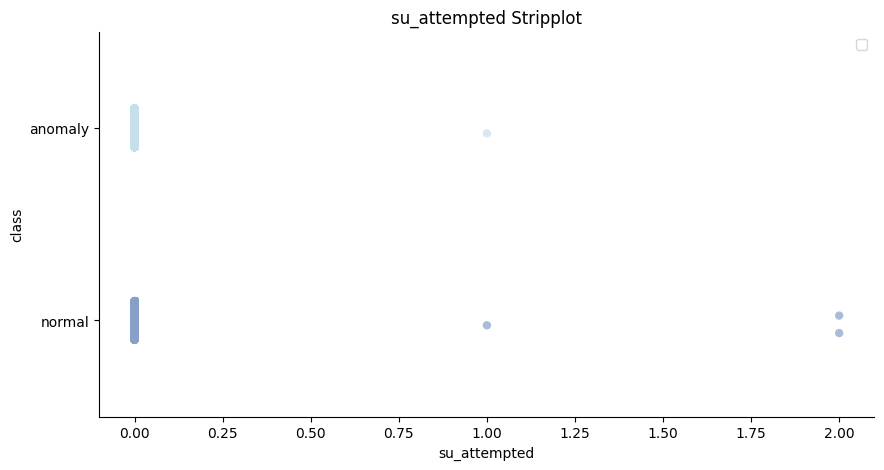

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


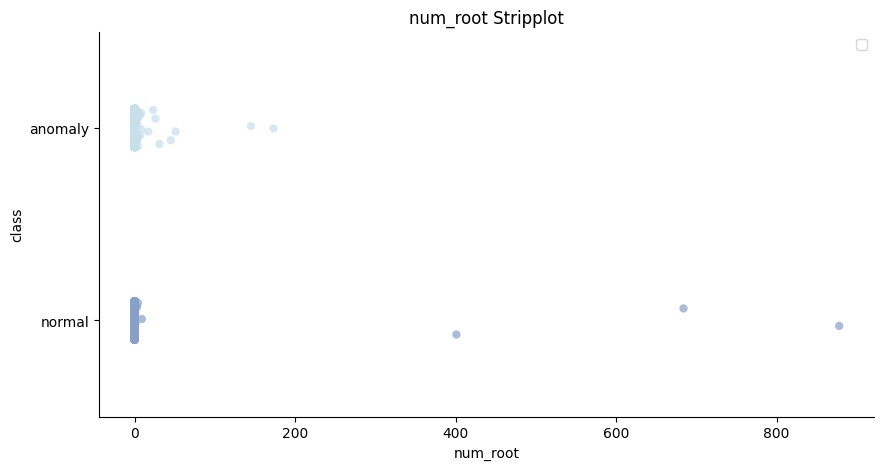

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


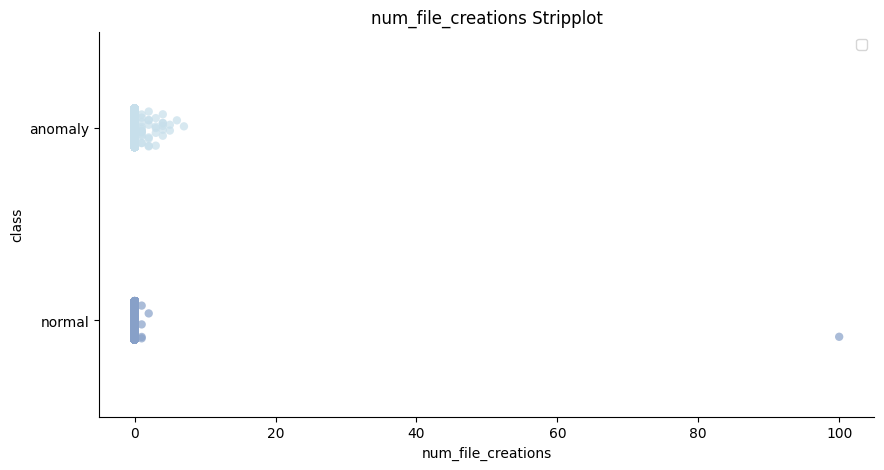

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


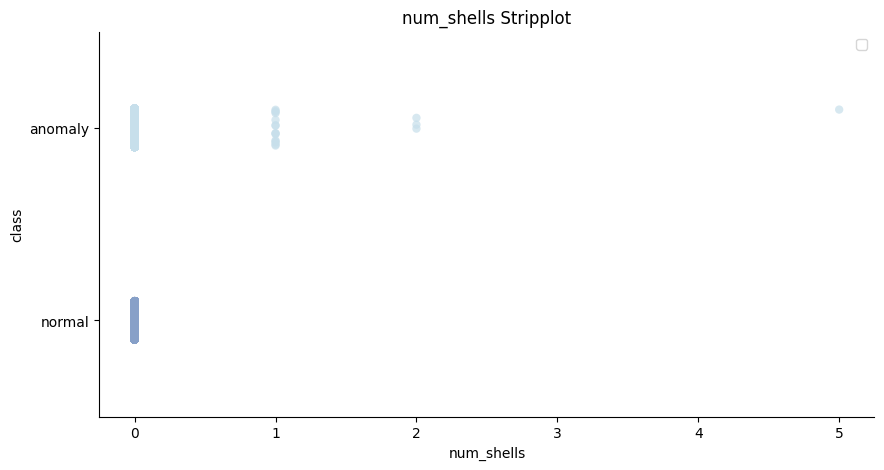

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


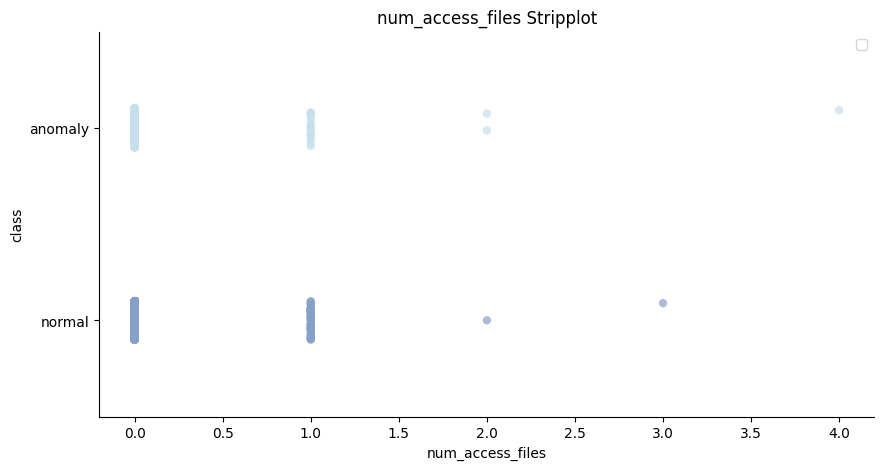

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


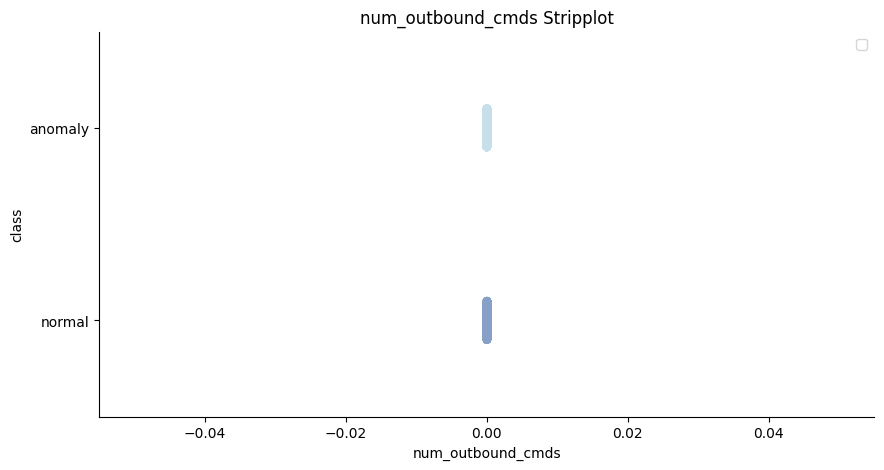

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


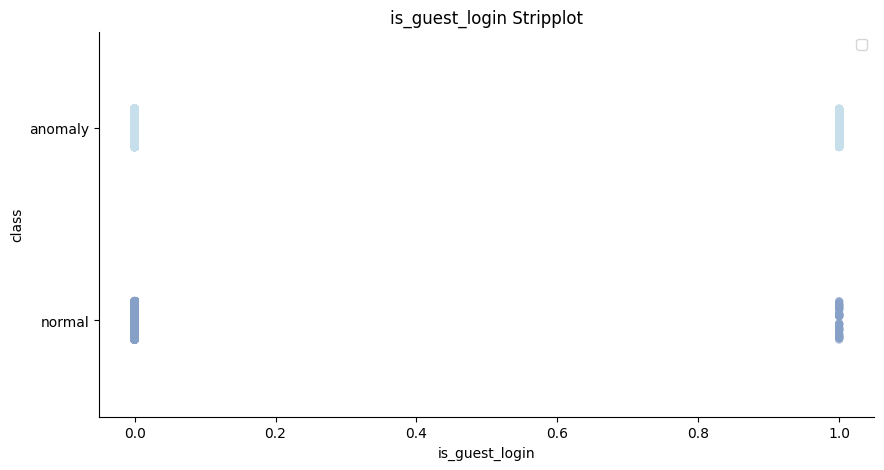

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


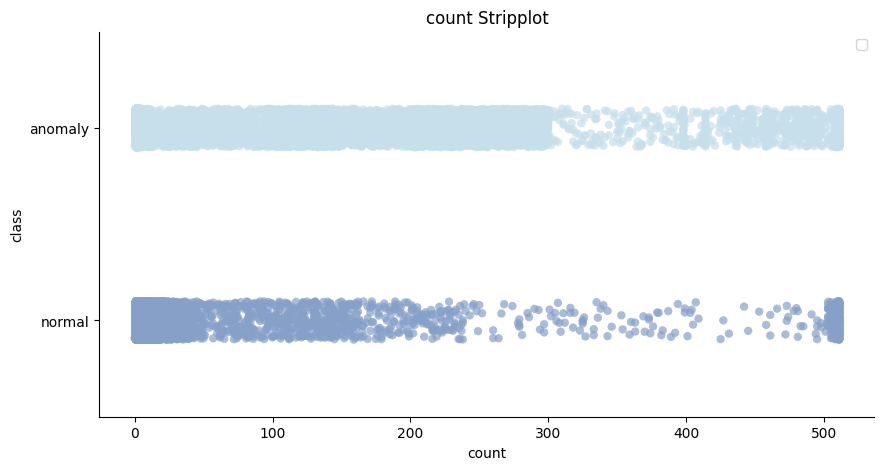

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


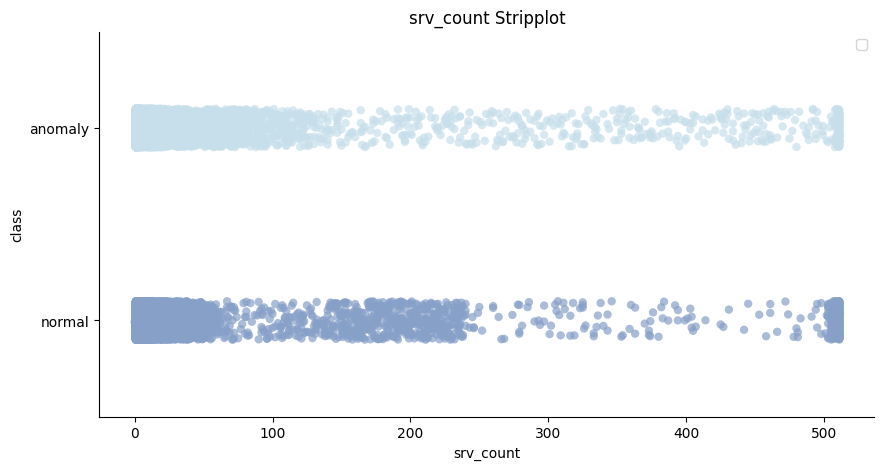

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


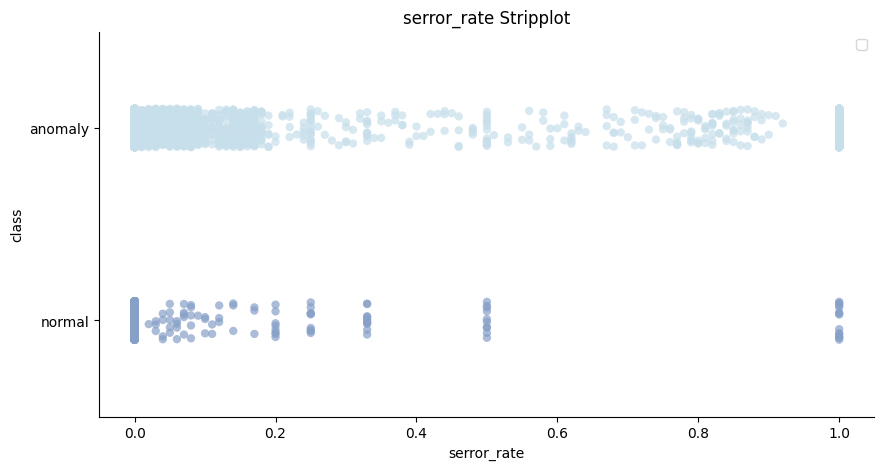

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


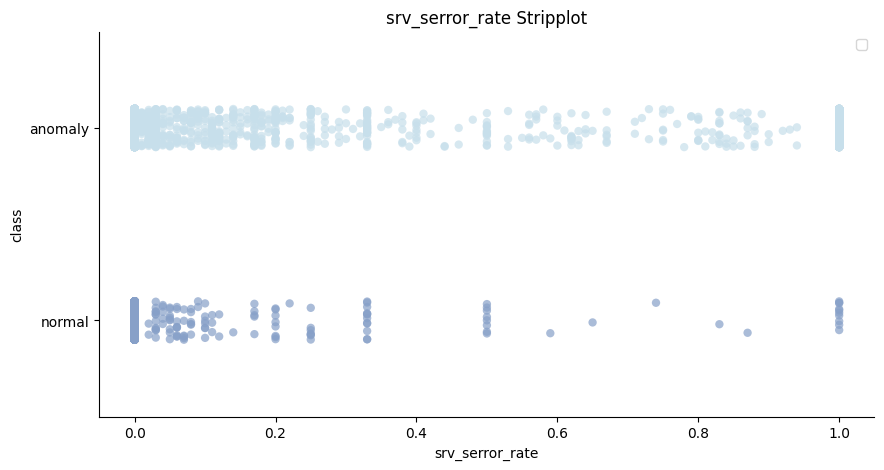

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


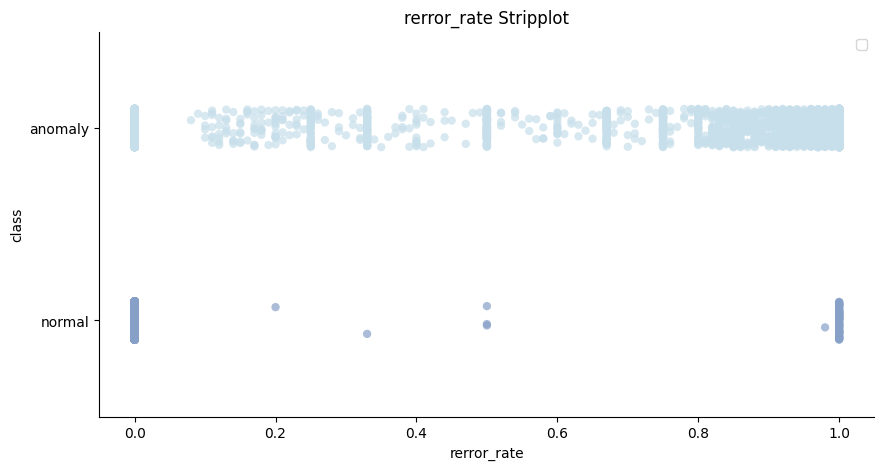

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


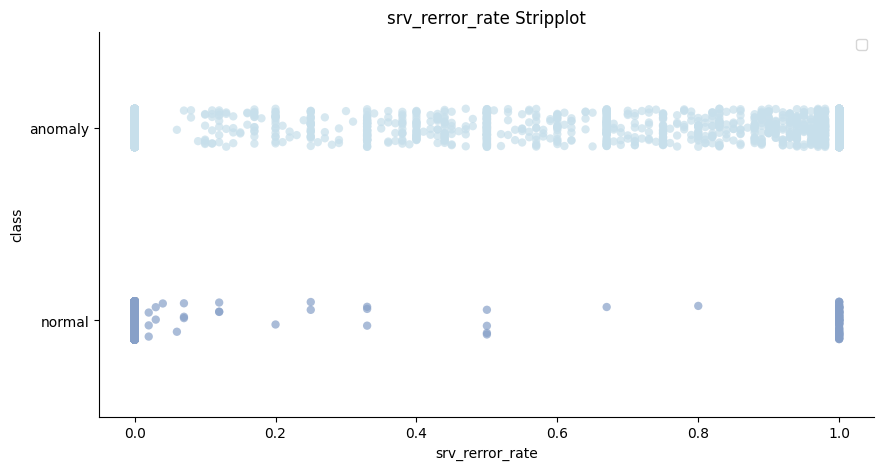

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


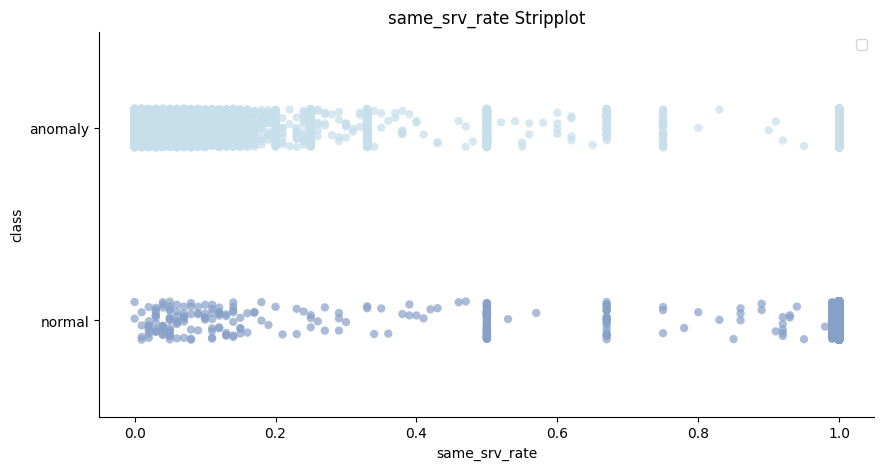

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


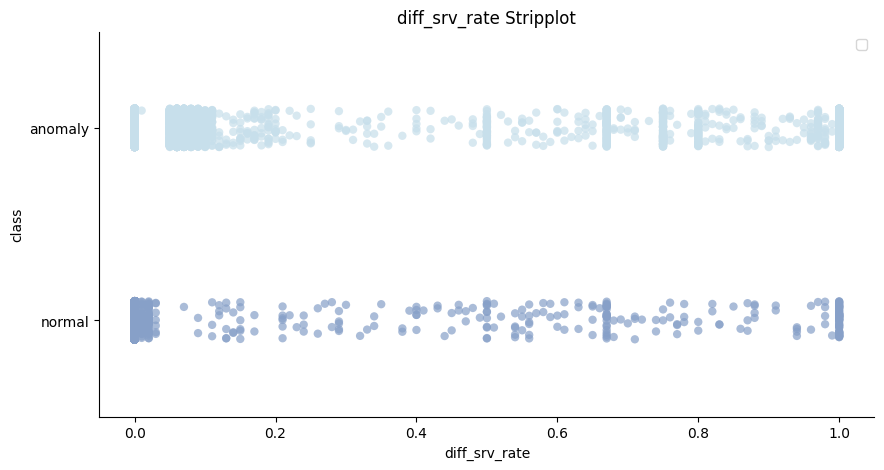

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


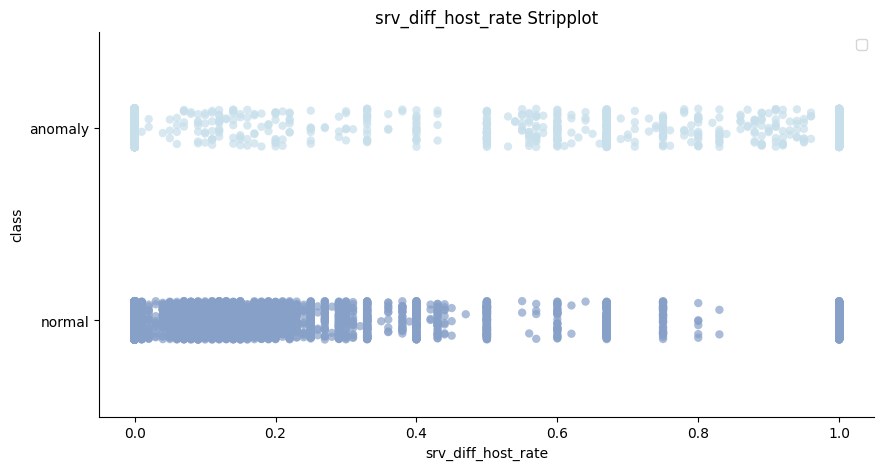

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


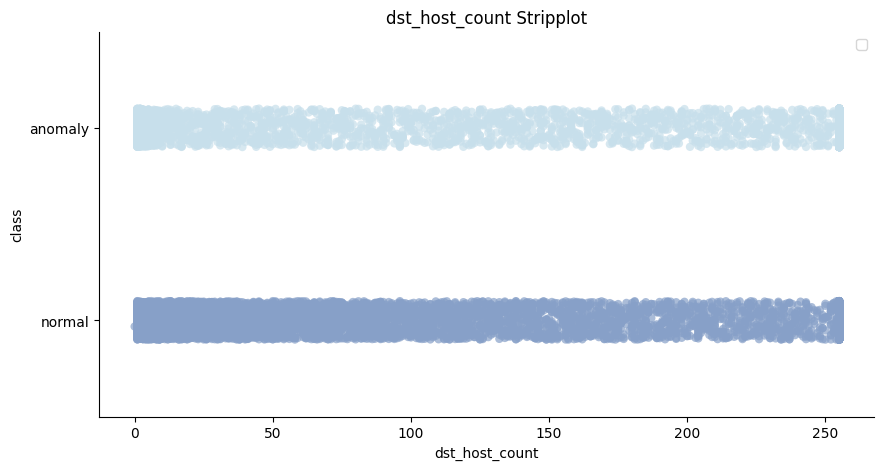

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


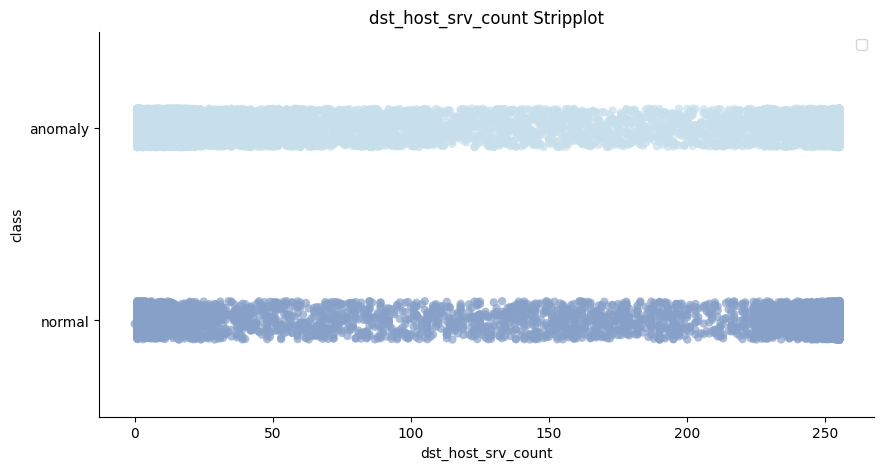

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


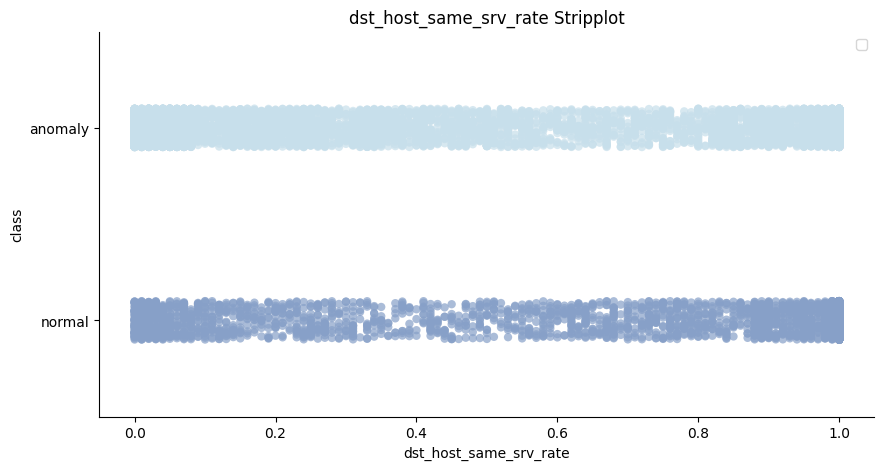

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


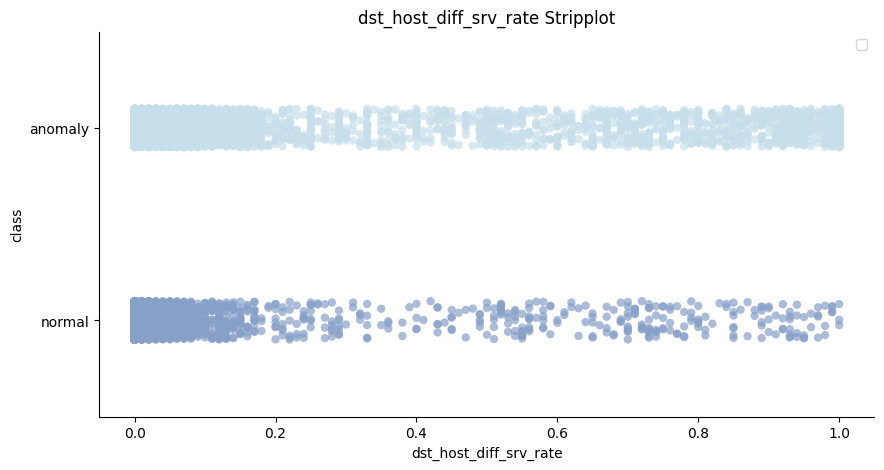

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


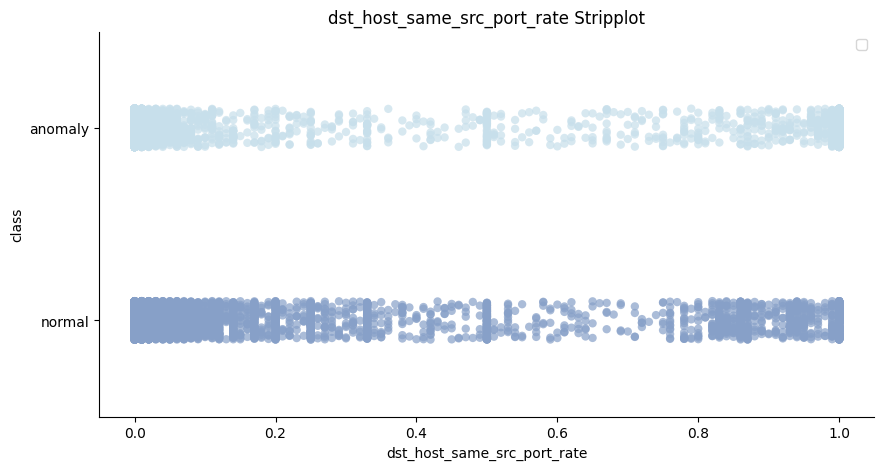

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


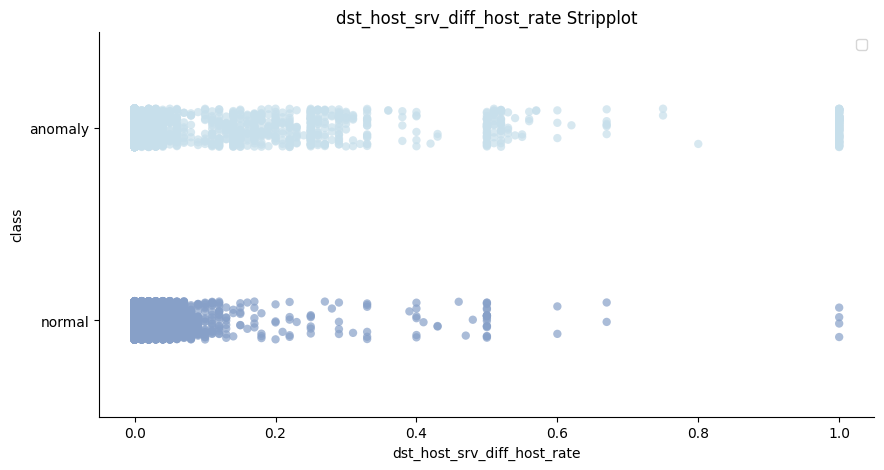

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


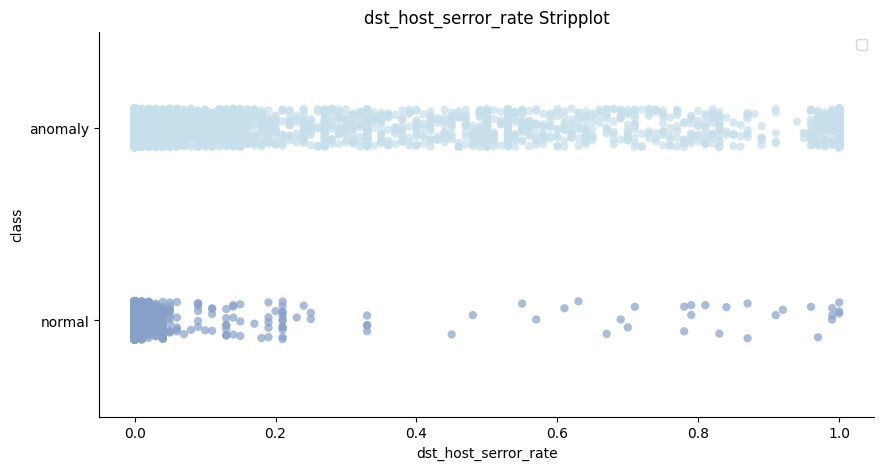

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


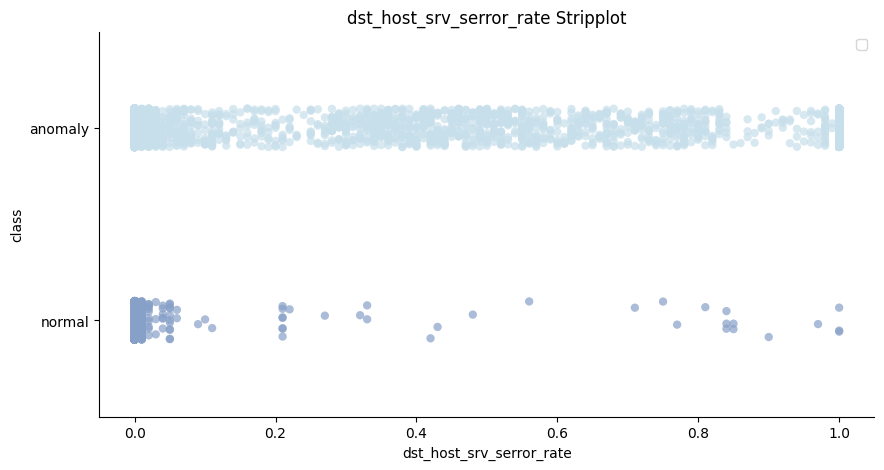

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


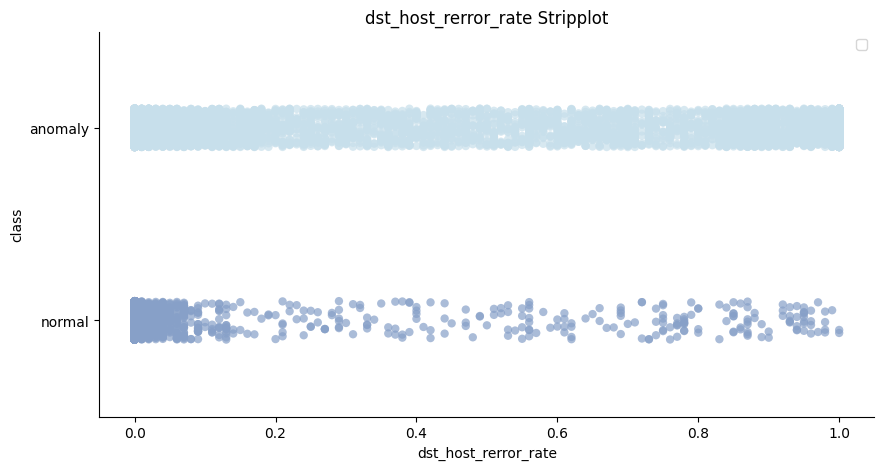

<ipython-input-10-f780065a29cd>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


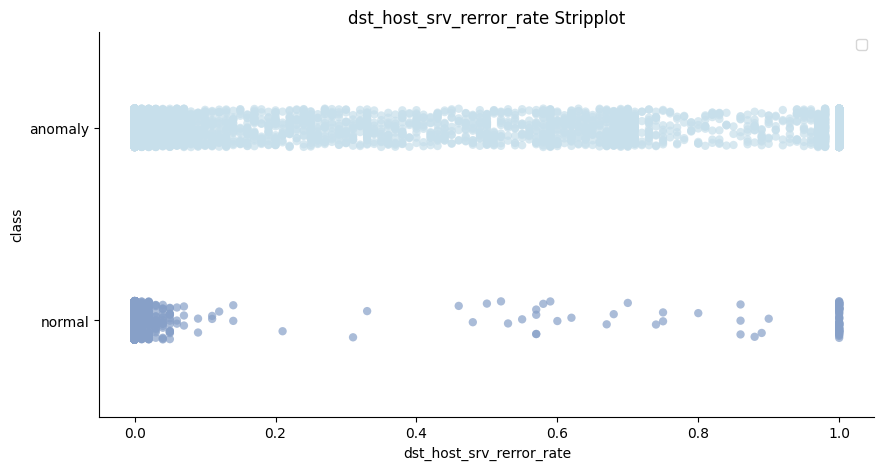

In [ ]:

custom_palette = sns.color_palette("ch:s=.25,rot=-.25", n_colors=4)

for col in df.iloc[:, 1:]:  # we ignore id column
    if col != 'class' and is_numeric_dtype(df[col]):
        fig, ax = plt.subplots(figsize=(10, 5))
        g2 = sns.stripplot(x=df[col], y=df['class'], hue=df['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)

        ax.set_title(f"{col} Stripplot")
        ax.set_xlabel(col)
        ax.set_ylabel("class")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        g2.legend(loc='upper right')
        plt.show()


Let's try to see if we can get correlation of different columns with our target variable(column) class. We will be using label encoder for class feature

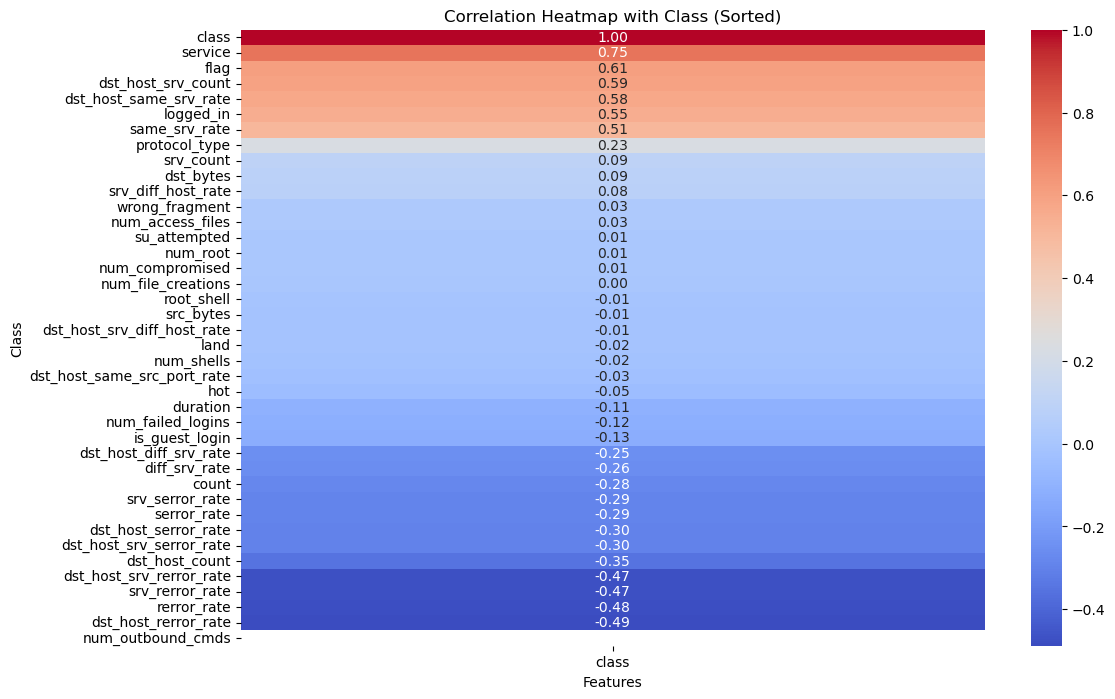

In [8]:
# Assuming dfPhase is your DataFrame and 'class' is the target column

# Encode the 'class' column using LabelEncoder
df['class'] = LabelEncoder().fit_transform(df['class'])

# Create a copy of the DataFrame for encoding
encoded_df = df.copy()

# Perform leave-one-out encoding for non-numeric columns
for col in encoded_df.columns:
    if col != 'class' and not pd.api.types.is_numeric_dtype(encoded_df[col]):
        means = encoded_df.groupby(col)['class'].mean()
        encoded_df[col] = encoded_df[col].map(means)

# Calculate correlation between non-numeric columns and 'class' column
correlation_with_class = encoded_df.corr()[['class']]

# Sort correlation values based on their values
sorted_correlation = correlation_with_class.sort_values(by='class', ascending=False)

# Plot heatmap for sorted correlation between non-numeric columns and 'class' column
plt.figure(figsize=(12, 8))
sns.heatmap(sorted_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Class (Sorted)')
plt.xlabel('Features')
plt.ylabel('Class')
plt.show()


The above correlation heat map helps us to identify how strongly different columns(features) are correlated to our target variable class. More the warm more is the correlation and is sorted in an order.

## Data Pre-processing and Cleaning

Check whether our dataset has duplicates or not

In [9]:
encoded_df.duplicated().sum()

64

This clearly shows our dataset has duplicates, let's try dropping them

In [10]:
encoded_df.drop_duplicates(inplace=True)
encoded_df.duplicated().sum()

0

Check if dataset has null values

In [11]:
encoded_df.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

This clearly shows dataset has nulls, let's try dropping them

In [12]:
encoded_df.dropna(inplace=True)
encoded_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

The above visual clearly shows distribution of different columns over our target column class : anamoly or normal

Let's try splitting data to Train and test set

In [13]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X =  encoded_df.drop(columns=['class'])
y =  encoded_df['class']

'''
Case 1: 		Train = 80 % Test = 20% [ x_train1, y_train1] = 80%;
 		[ x_test1, y_test1] = 20%;
'''
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can convert them back to DataFrames if needed
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_train_df = pd.Series(y_train, name='class')
y_test_df = pd.Series(y_test, name='class')

In the below cell we applied standard scalar for the train set.
The StandardScaler in scikit-learn scales each feature by subtracting the mean and then dividing by the standard deviation of the feature. This results in each feature having a mean of 0 and a standard deviation of 1, making the features have the same scale

In [14]:
# Scaling the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We can apply random forest classifer and get most prominent features. Earlier we applied correlation heat map, but this can further help in fine tune and help us in selecting best feature.

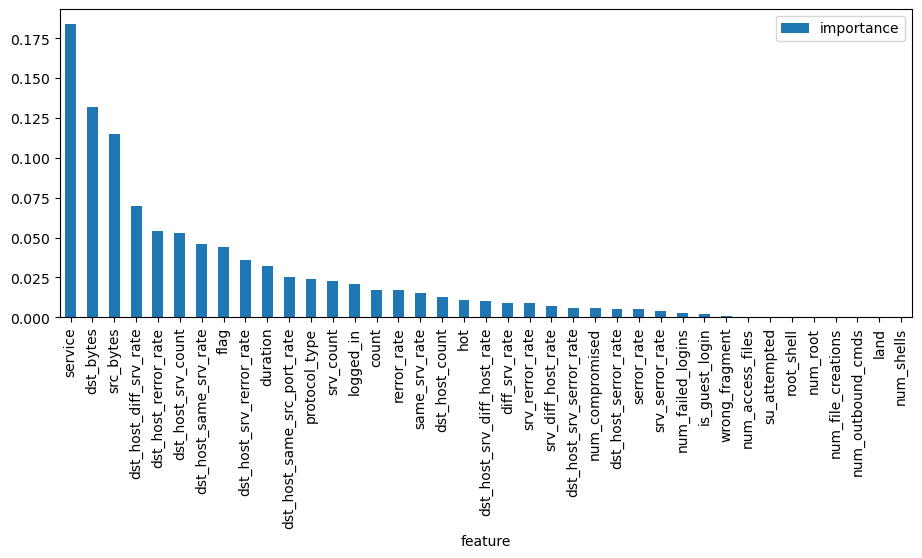

In [59]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier();
rfc.fit(X, y);

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

selecting best features

In [60]:

# Selecting best and important features
encoded_df = encoded_df.loc[:,['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'class']]

In [61]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X =  encoded_df.drop(columns=['class'])
y =  encoded_df['class']

'''
Case 1: Train = 80 % Test = 20% [ x_train1, y_train1] = 80%;
       [ x_test1, y_test1] = 20%;
'''
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can convert them back to DataFrames if needed
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_train_df = pd.Series(y_train, name='class')
y_test_df = pd.Series(y_test, name='class')

'''
Case 2: 		Train = 10 % Test = 90% [ x_train2, y_train2] = 10%;
[ x_test2, y_test2] = 90%
'''
# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# # Optionally, you can convert them back to DataFrames if needed
# X_train_df = pd.DataFrame(X_train, columns=X.columns)
# X_test_df = pd.DataFrame(X_test, columns=X.columns)
# y_train_df = pd.Series(y_train, name='class')
# y_test_df = pd.Series(y_test, name='class')

# Scaling the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 k-fold cross validation.

In [62]:
from sklearn.model_selection import KFold

# Define the number of splits (K)
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate over the splits and train/test indices
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f'Fold {fold+1}:')
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    print(X_train)
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

Fold 1:
        service      flag  src_bytes  dst_bytes  count  same_srv_rate  \
0      0.178467  0.008831          0          0    229           0.04   
1      0.178467  0.008831          0          0    136           0.01   
2      0.376028  0.645849      12983          0      1           1.00   
4      0.027060  0.002587          0         15      1           1.00   
5      0.849739  0.645849        267      14515      4           1.00   
...         ...       ...        ...        ...    ...            ...   
22537  0.661670  0.645849       2599        293      2           1.00   
22538  0.063830  0.645849       1032          0     53           1.00   
22539  0.661670  0.645849        794        333      1           1.00   
22541  0.849739  0.645849      54540       8314      5           1.00   
22543  0.000000  0.008831          0          0      4           0.25   

       diff_srv_rate  dst_host_srv_count  dst_host_same_srv_rate  \
0               0.06                10.0       

In [63]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Splitting the data into features (X) and target variable (y)
X =  encoded_df.drop(columns=['class'])
y =  encoded_df['class']

# Initialize a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Initialize K-Fold Cross-Validator with k=5
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
accuracy_scores = []
cnt=1
for fold, (train_indices, test_indices) in enumerate(k_fold.split(X)):
    print(f'Fold:{cnt}, Train set: {len(train_indices)}, Test set:{len(test_indices)}')
    cnt+=1
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Current Accuracy is: {accuracy}")

# Compute the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Average Accuracy:", avg_accuracy)


Fold:1, Train set: 17972, Test set:4494
Current Accuracy is: 0.9365821094793058
Fold:2, Train set: 17973, Test set:4493
Current Accuracy is: 0.928555530825729
Fold:3, Train set: 17973, Test set:4493
Current Accuracy is: 0.9332294680614289
Fold:4, Train set: 17973, Test set:4493
Current Accuracy is: 0.9245492989094146
Fold:5, Train set: 17973, Test set:4493
Current Accuracy is: 0.9363454262185622
Average Accuracy: 0.931852366698888


In [64]:
for fold, (train_indices, test_indices) in enumerate(k_fold.split(X)):
    print(f'Fold {fold+1}:')

Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:


## Model Building 1 - Logistic Regresstion

Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
#model_eval(model,X_train,y_train)
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
#model.fit(X, y)

lr_pred=model.predict(X_test)

In [67]:
lr_df=pd.DataFrame()
lr_df['actual']=y_test
lr_df['pred']=lr_pred

In [68]:
lr_df.head()

,actual,pred
9,0,0
12,0,0
14,1,1
18,1,1
27,1,1


# Model Building -2 Decsion Trees

Decsion Making
*   statisitcal models like decision tree is good for highly skewed data
*   It works for both continuous as well as categorical output variables.

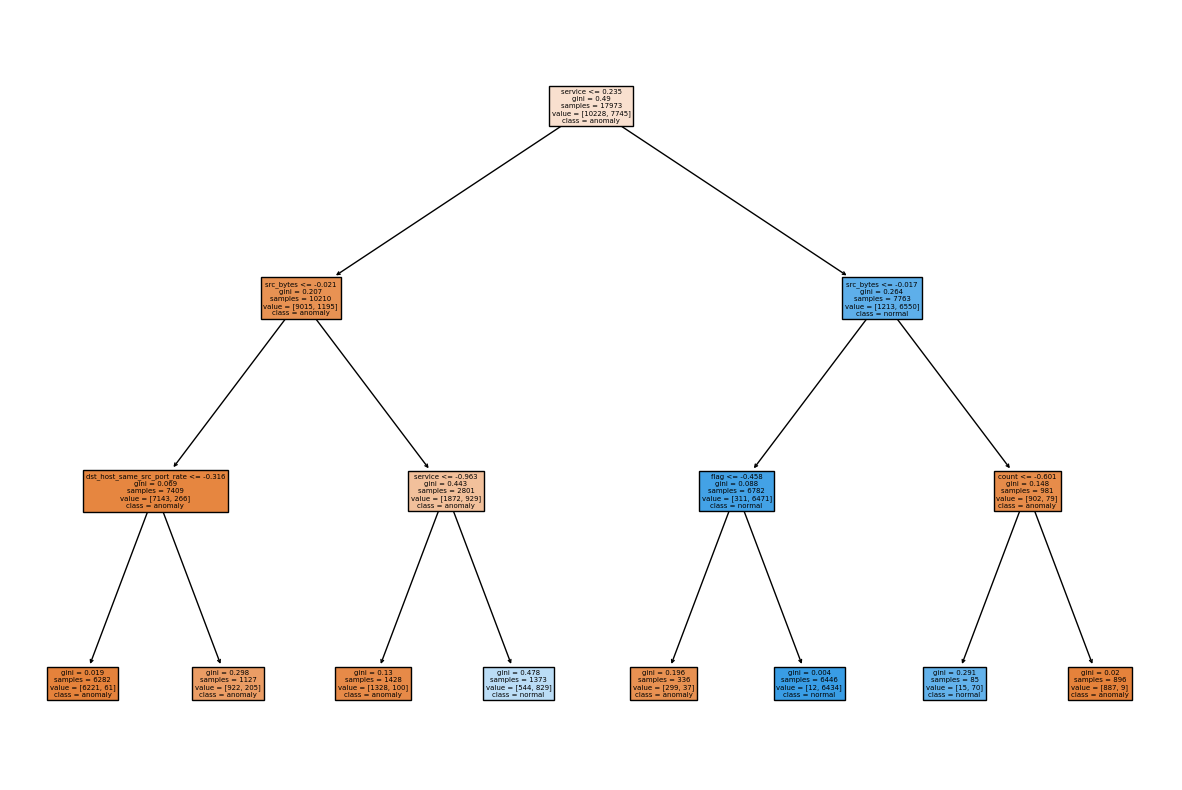

In [69]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def train_using_gini(X_train, y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=42, max_depth=3, min_samples_leaf=5)
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to plot the decision tree
def plot_decision_tree(clf_object):
    plt.figure(figsize=(15, 10))
    #plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plot_tree(clf_object, filled=True, feature_names=X.columns.tolist(), class_names=['anomaly', 'normal'])
    plt.show()

# print("getting feature train data", X_train)
# print("getting target trqain data", y_train)
clf_gini = train_using_gini(X_train, y_train)

# Visualizing the Decision Trees
plot_decision_tree(clf_gini)

## Performance Evaluation of Logistic Regression

> Indented block



This function is to predict and evaluate the model, so that we can test best models

In [70]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score



def model_eval(model,X,y):

    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")

    model.fit(X, y)
    pred = model.predict(X_test)

    print(f"Classification report:  {classification_report(y_test, pred)}")
    print(f"Confusion matrix: {confusion_matrix(y_test, pred)}")
    print(f"Accuracy score: {accuracy_score(y_test, pred) * 100}")
    print(f"ROC_AUC_SCORE: {roc_auc_score(y_test, pred)}")


    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

ROC AUC: 0.9624 (+/- 0.0053)
Classification report:                precision    recall  f1-score   support

           0       0.93      0.94      0.93      2544
           1       0.91      0.90      0.91      1950

    accuracy                           0.92      4494
   macro avg       0.92      0.92      0.92      4494
weighted avg       0.92      0.92      0.92      4494

Confusion matrix: [[2380  164]
 [ 188 1762]]
Accuracy score: 92.17
ROC AUC SCORE: 0.92


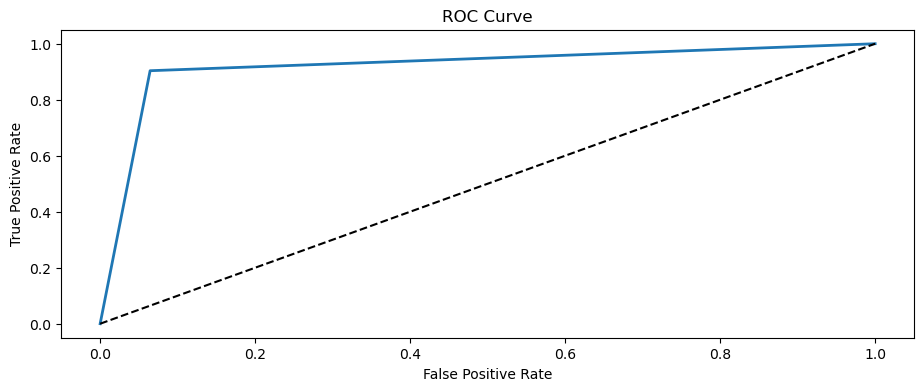

In [71]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RidgeClassifier with regularization strength (alpha)
ridge_model = RidgeClassifier(alpha=1.0,max_iter=1000)  # You can adjust alpha to control the strength of regularization

def model_eval2(model, X_train, X_test, y_train, y_test):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print(f"Classification report:  {classification_report(y_test, pred)}")
    print(f"Confusion matrix: {confusion_matrix(y_test, pred)}")
    print(f"Accuracy score: {accuracy_score(y_test, pred) * 100:.2f}")
    print(f"ROC AUC SCORE: {roc_auc_score(y_test, pred):.2f}")

    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

model_eval2(ridge_model, X_train, X_test, y_train, y_test)


ROC AUC: 0.9691 (+/- 0.0019)
Classification report:                precision    recall  f1-score   support

           0       0.91      0.91      0.91      2544
           1       0.88      0.89      0.88      1950

    accuracy                           0.90      4494
   macro avg       0.90      0.90      0.90      4494
weighted avg       0.90      0.90      0.90      4494

Confusion matrix: [[2306  238]
 [ 221 1729]]
Accuracy score: 89.79
ROC AUC SCORE: 0.90


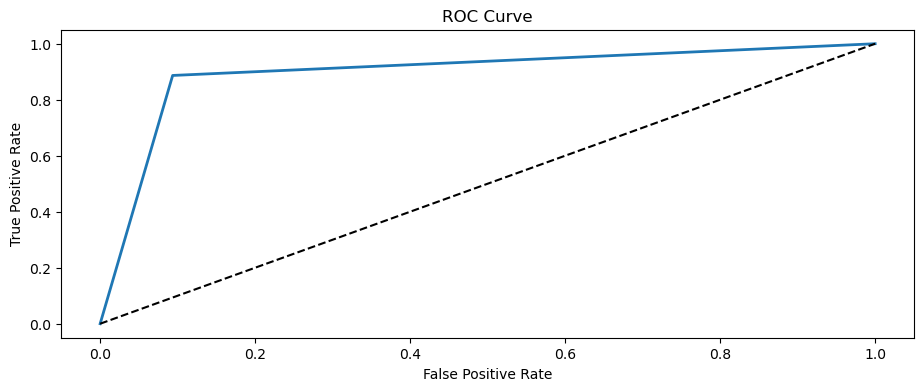

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # You can adjust parameters if needed

def model_eval2(model, X_train, X_test, y_train, y_test):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print(f"Classification report:  {classification_report(y_test, pred)}")
    print(f"Confusion matrix: {confusion_matrix(y_test, pred)}")
    print(f"Accuracy score: {accuracy_score(y_test, pred) * 100:.2f}")
    print(f"ROC AUC SCORE: {roc_auc_score(y_test, pred):.2f}")

    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

model_eval2(logistic_model, X_train, X_test, y_train, y_test)


In [74]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Classification report, Accuracy score, ROC AUC score for Ridge Classifier
ridge_scores = {}
ridge_scores['Model'] = 'Ridge Classifier'
ridge_scores['Classification Report'] = classification_report(y_test, ridge_model.predict(X_test))
ridge_scores['Accuracy Score'] = accuracy_score(y_test, ridge_model.predict(X_test))
ridge_scores['ROC AUC Score'] = roc_auc_score(y_test, ridge_model.predict(X_test))

# Classification report, Accuracy score, ROC AUC score for Logistic Regression
logistic_scores = {}
logistic_scores['Model'] = 'Logistic Regression'
logistic_scores['Classification Report'] = classification_report(y_test, logistic_model.predict(X_test))
logistic_scores['Accuracy Score'] = accuracy_score(y_test, logistic_model.predict(X_test))
logistic_scores['ROC AUC Score'] = roc_auc_score(y_test, logistic_model.predict(X_test))

# Combine the results into a list
results = [ridge_scores, logistic_scores]

# Create a table
table_headers = ['Model', 'Classification Report', 'Accuracy Score', 'ROC AUC Score']
table_data = [[result[header] for header in table_headers] for result in results]

# Print the table
from tabulate import tabulate
print(tabulate(table_data, headers=table_headers, tablefmt='grid'))


+---------------------+-------------------------------------------------------+------------------+-----------------+
| Model               | Classification Report                                 |   Accuracy Score |   ROC AUC Score |
+=====================+=======================================================+==================+=================+
| Ridge Classifier    | precision    recall  f1-score   support               |         0.921673 |        0.919562 |
|                     |                                                       |                  |                 |
|                     |            0       0.93      0.94      0.93      2544 |                  |                 |
|                     |            1       0.91      0.90      0.91      1950 |                  |                 |
|                     |                                                       |                  |                 |
|                     |     accuracy                           0

C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

ROC AUC: 0.9600 (+/- 0.0144)
Classification report:                precision    recall  f1-score   support

           0       0.91      0.91      0.91      2544
           1       0.88      0.89      0.88      1950

    accuracy                           0.90      4494
   macro avg       0.90      0.90      0.90      4494
weighted avg       0.90      0.90      0.90      4494

Confusion matrix: [[2305  239]
 [ 218 1732]]
Accuracy score: 89.83088562527814
ROC_AUC_SCORE: 0.8971292936623125


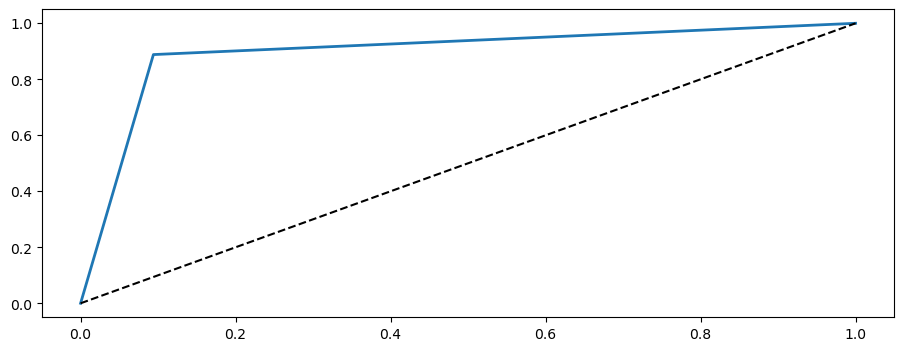

In [72]:
model_eval(model,X_train,y_train)

In [ ]:
model_eval2(model,X_train,y_train)

TypeError: model_eval2() missing 2 required positional arguments: 'y_train' and 'y_test'

In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, lr_pred).ravel()

In [ ]:
print("True Negatives:",tn)
print("False Positives:",fp)
print("False Negatives:",fn)
print("True Positives:",tp)

# Performance Evaluation - Decsion Tree

This function is to predict and evaluate the model, so that we can test best models

In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

## Model Deployment

In [ ]:
import pickle
# save the model to disk
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))